<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>

## Assignment Objective ##

The aim of this assignment is to guide you through the process of understanding a dataset,
performing preprocessing, building classification models, including ensemble learning techniques,
and evaluation using cross-validation and various metrics.

## Importing Libraries

In [58]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


## Load the Dataset

In [66]:
# Step 1: Load the Dataset
data = pd.read_csv('Student_dataset (1).csv')

## Dataset Overview , Missing Values, Duplicate Rows

In [70]:
# Step 2: Data Exploration
print("1. Dataset Overview")
print("-------------------")
print(f"Shape: {data.shape}")
print(f"Columns: {data.columns.tolist()}")
print(f"\nMissing Values:\n{data.isnull().sum()}")
print(f"Duplicate Rows: {data.duplicated().sum()}")




1. Dataset Overview
-------------------
Shape: (4446, 37)
Columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 

## Visualizing Distribution


3. Visualizing Distributions
-----------------------------


C:\Users\maniq\AppData\Local\Temp\ipykernel_11952\1771921265.py:12: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\maniq\anaconda3\envs\CDS6314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


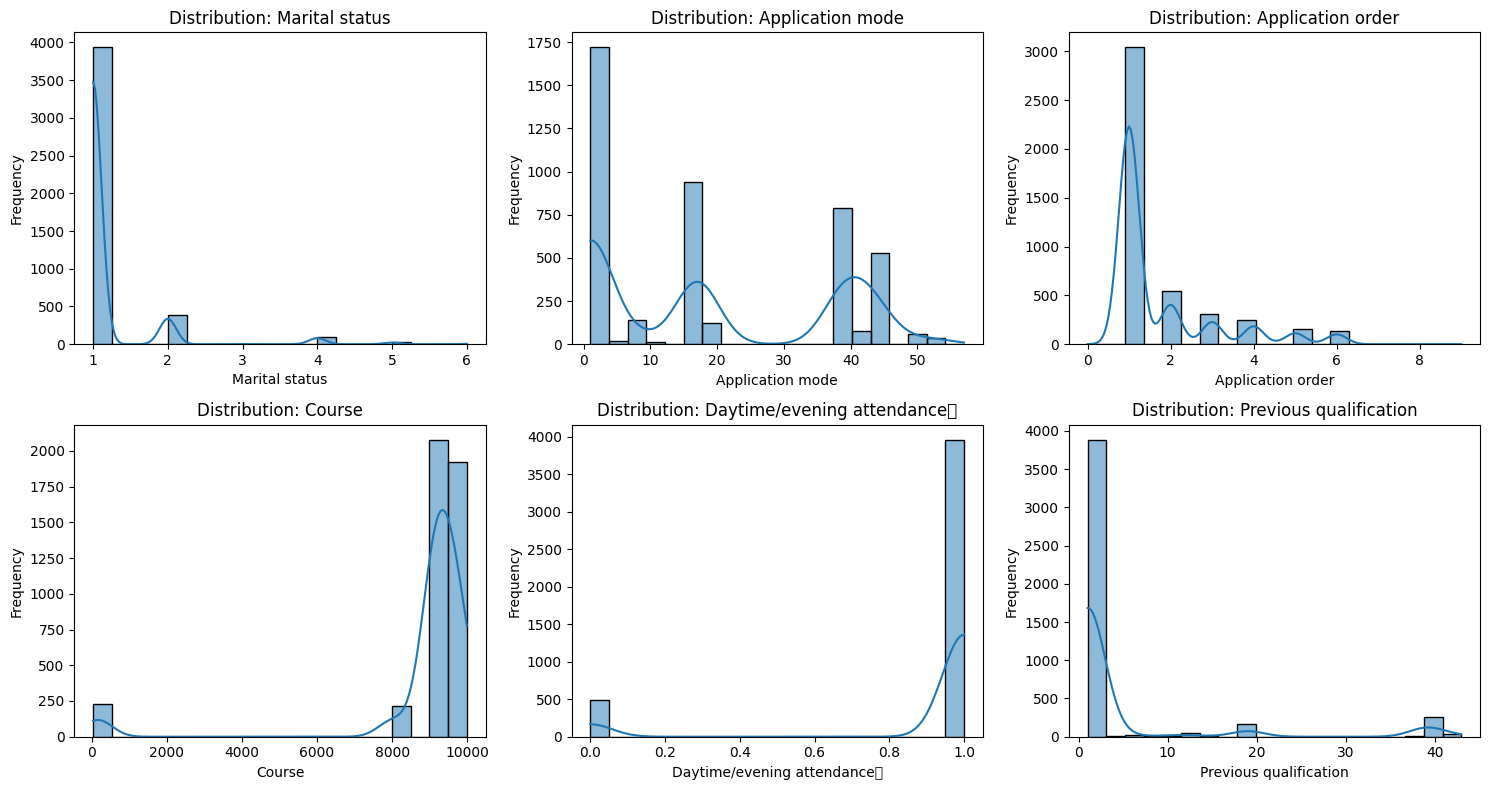

In [74]:

print("\n3. Visualizing Distributions")
print("-----------------------------")

plt.figure(figsize=(15, 8))  # Set the figure size
for i, col in enumerate(numerical_cols[:6], 1):  # Loop through the first 6 numerical columns
    plt.subplot(2, 3, i)  # Create a 2x3 grid of subplots
    sns.histplot(data[col], kde=True, bins=20)  # Plot the histogram with KDE
    plt.title(f'Distribution: {col}')  # Set the title
    plt.xlabel(col)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


## Visualizing Target Variable


4. Target Variable Visualization
---------------------------------


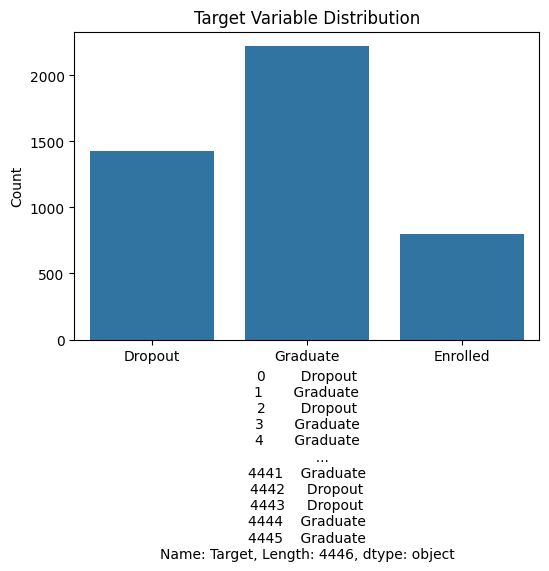

In [80]:
# Step 4: Visualizing the Target Variable

print("\n4. Target Variable Visualization")
print("---------------------------------")
target_col = data['Target']
plt.figure(figsize=(6, 4))  # Set the figure size
sns.countplot(data=data, x=target_col)  # Plot a countplot for the target variable
plt.title('Target Variable Distribution')  # Set the title
plt.xlabel(target_col)  # Label the x-axis with the target column name
plt.ylabel('Count')  # Label the y-axis with 'Count'
plt.show()  # Display the plot


## Data Cleaning

In [83]:
# Step 5: Data Preprocessing

print("\n5. Data Preprocessing")
print("---------------------")

# Handle Missing Values
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Remove Duplicates
data = data.drop_duplicates()

# Normalize Numerical Features
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(f"\nMissing Values After Cleaning:")
print(data.isnull().sum())



5. Data Preprocessing
---------------------

Missing Values After Cleaning:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                 

In [84]:
# Save the cleaned data for further use
cleaned_data.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned data saved to 'cleaned_dataset.csv'.")

Cleaned data saved to 'cleaned_dataset.csv'.


In [85]:
print(data_cleaned.shape)

(4424, 37)


In [86]:
print("\nSample Data:\n")
data.head()


Sample Data:



,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.0,0.418605,0.255814,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,Dropout
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.0,0.000000,0.046512,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,Graduate
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.0,0.837209,0.837209,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,Dropout
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.0,0.860465,0.837209,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,Graduate
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.0,0.837209,0.860465,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,Graduate


In [90]:
data.select_dtypes(['int64', 'float64']).describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.035714,0.315339,0.191983,0.886230,0.890823,0.085185,0.395897,0.008085,0.431377,0.494775,...,0.011472,0.028517,0.270963,0.244342,0.221790,0.550857,0.012526,0.461179,0.450673,0.536588
std,0.121149,0.312110,0.145977,0.206804,0.311897,0.243252,0.138752,0.064023,0.362686,0.356816,...,0.057573,0.100976,0.095476,0.119635,0.150738,0.280582,0.062815,0.309750,0.307269,0.299859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.111111,0.909018,1.000000,0.000000,0.315789,0.000000,0.023256,0.046512,...,0.000000,0.000000,0.217391,0.181818,0.100000,0.578846,0.000000,0.209302,0.244444,0.311757
50%,0.000000,0.285714,0.111111,0.924382,1.000000,0.000000,0.401053,0.000000,0.418605,0.418605,...,0.000000,0.000000,0.260870,0.242424,0.250000,0.656923,0.000000,0.406977,0.488889,0.578600
75%,0.000000,0.678571,0.222222,0.956317,1.000000,0.000000,0.473684,0.000000,0.837209,0.837209,...,0.000000,0.000000,0.304348,0.303030,0.300000,0.717949,0.000000,0.732558,0.755556,0.772787
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
data.select_dtypes(['object']).describe()

,Target
count,4424
unique,3
top,Graduate
freq,2209


C:\Users\maniq\anaconda3\envs\CDS6314\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\maniq\anaconda3\envs\CDS6314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


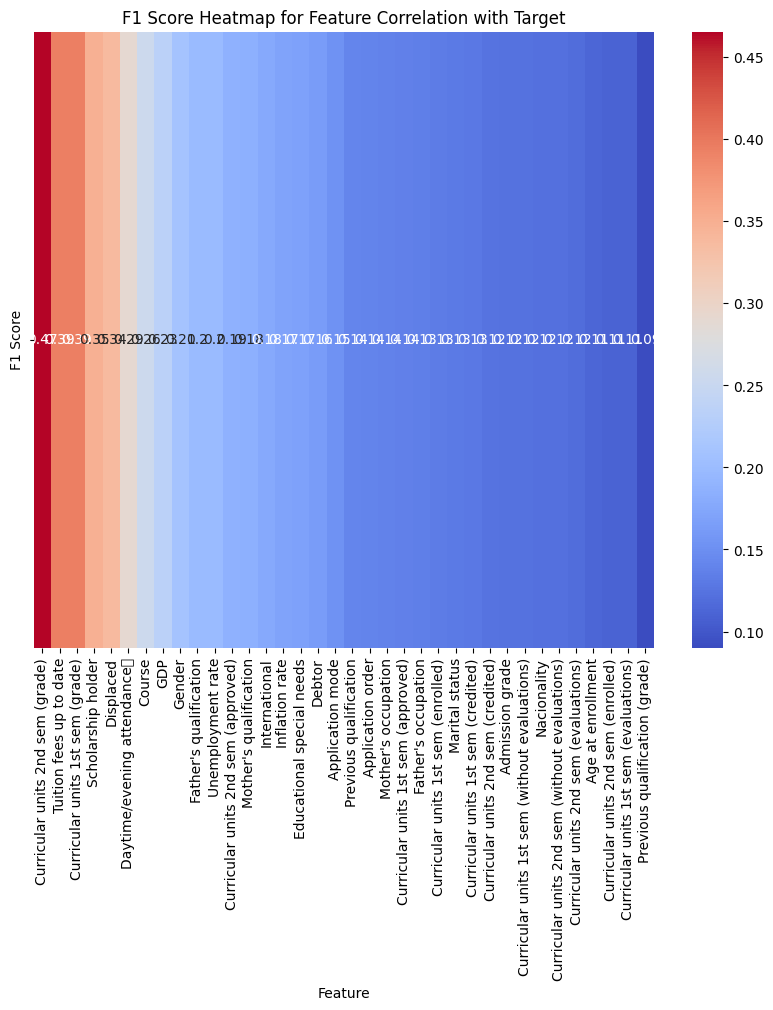

The feature with the best correlation to the target is: Curricular units 2nd sem (grade) with F1 Score: 0.4654112569249695


In [57]:
# Importing required libraries
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.metrics import f1_score
import numpy as np

# Step 1: Encode categorical features and target
def encode_data(data, target_column):
    encoder = LabelEncoder()
    encoded_data = data.copy()
    for col in encoded_data.select_dtypes(include=['object']).columns:
        encoded_data[col] = encoder.fit_transform(encoded_data[col])
    encoded_data[target_column] = encoder.fit_transform(encoded_data[target_column])
    return encoded_data

encoded_data = encode_data(cleaned_data, 'Target')  # Replace 'Target' with your actual target column

# Step 2: Discretize numerical features
def discretize_features(data, numerical_cols, n_bins=4):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    discretized_data = data.copy()
    discretized_data[numerical_cols] = discretizer.fit_transform(discretized_data[numerical_cols])
    return discretized_data

numerical_cols = encoded_data.select_dtypes(include=['float64', 'int64']).columns
discretized_data = discretize_features(encoded_data, numerical_cols)

# Step 3: Compute F1 Scores for all features with respect to the target
def compute_f1_scores(data, target_column):
    target = data[target_column]
    f1_scores = {}
    for col in data.columns:
        if col != target_column:
            f1 = f1_score(target, data[col], average='macro')  # Use macro for multiclass targets
            f1_scores[col] = f1
    return f1_scores

f1_scores = compute_f1_scores(discretized_data, 'Target')

# Step 4: Convert F1 Scores to a DataFrame for visualization
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Feature', 'F1 Score'])
f1_df = f1_df.sort_values(by='F1 Score', ascending=False)

# Step 5: Visualize the F1 Scores as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(f1_df.set_index('Feature').T, cmap='coolwarm', annot=True)
plt.title('F1 Score Heatmap for Feature Correlation with Target')
plt.show()

# Step 6: Select the best correlation feature
best_feature = f1_df.iloc[0]
print(f"The feature with the best correlation to the target is: {best_feature['Feature']} with F1 Score: {best_feature['F1 Score']}")


In [95]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
correlation_matrix




Correlation Matrix:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.263755,-0.125854,0.046255,-0.274939,0.062529,-0.022275,-0.008843,0.193500,0.130353,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.263755,1.000000,-0.286144,0.064502,-0.304407,0.422487,-0.039662,-0.000589,0.120041,0.084108,...,0.045960,0.238697,0.130156,0.168077,-0.071226,-0.115090,0.048116,0.088862,-0.016353,-0.021826
Application order,-0.125854,-0.286144,1.000000,0.058814,0.158657,-0.184315,-0.064389,-0.022416,-0.065349,-0.050288,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046255,0.064502,0.058814,1.000000,-0.042996,0.006335,-0.076276,-0.034080,0.055013,0.049960,...,0.034412,-0.090330,0.399393,0.277394,0.196713,0.347385,0.030741,0.008470,0.018852,-0.022073
Daytime/evening attendance\t,-0.274939,-0.304407,0.158657,-0.042996,1.000000,-0.071871,0.053498,0.018530,-0.205154,-0.139894,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422487,-0.184315,0.006335,-0.071871,1.000000,0.103907,-0.029214,-0.013357,-0.006614,...,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022275,-0.039662,-0.064389,-0.076276,0.053498,0.103907,1.000000,0.054146,-0.061047,-0.034515,...,-0.001999,-0.018300,-0.030558,-0.060721,0.050309,0.053218,-0.015527,0.045022,0.018665,-0.052403
Nacionality,-0.008843,-0.000589,-0.022416,-0.034080,0.018530,-0.029214,0.054146,1.000000,-0.049867,-0.085282,...,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193500,0.120041,-0.065349,0.055013,-0.205154,-0.013357,-0.061047,-0.049867,1.000000,0.534488,...,0.003348,0.043023,0.035705,0.021273,-0.014625,-0.030884,0.021479,-0.114217,0.060130,-0.083793
Father's qualification,0.130353,0.084108,-0.050288,0.049960,-0.139894,-0.006614,-0.034515,-0.085282,0.534488,1.000000,...,-0.017333,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610


C:\Users\maniq\anaconda3\envs\CDS6314\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\maniq\anaconda3\envs\CDS6314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


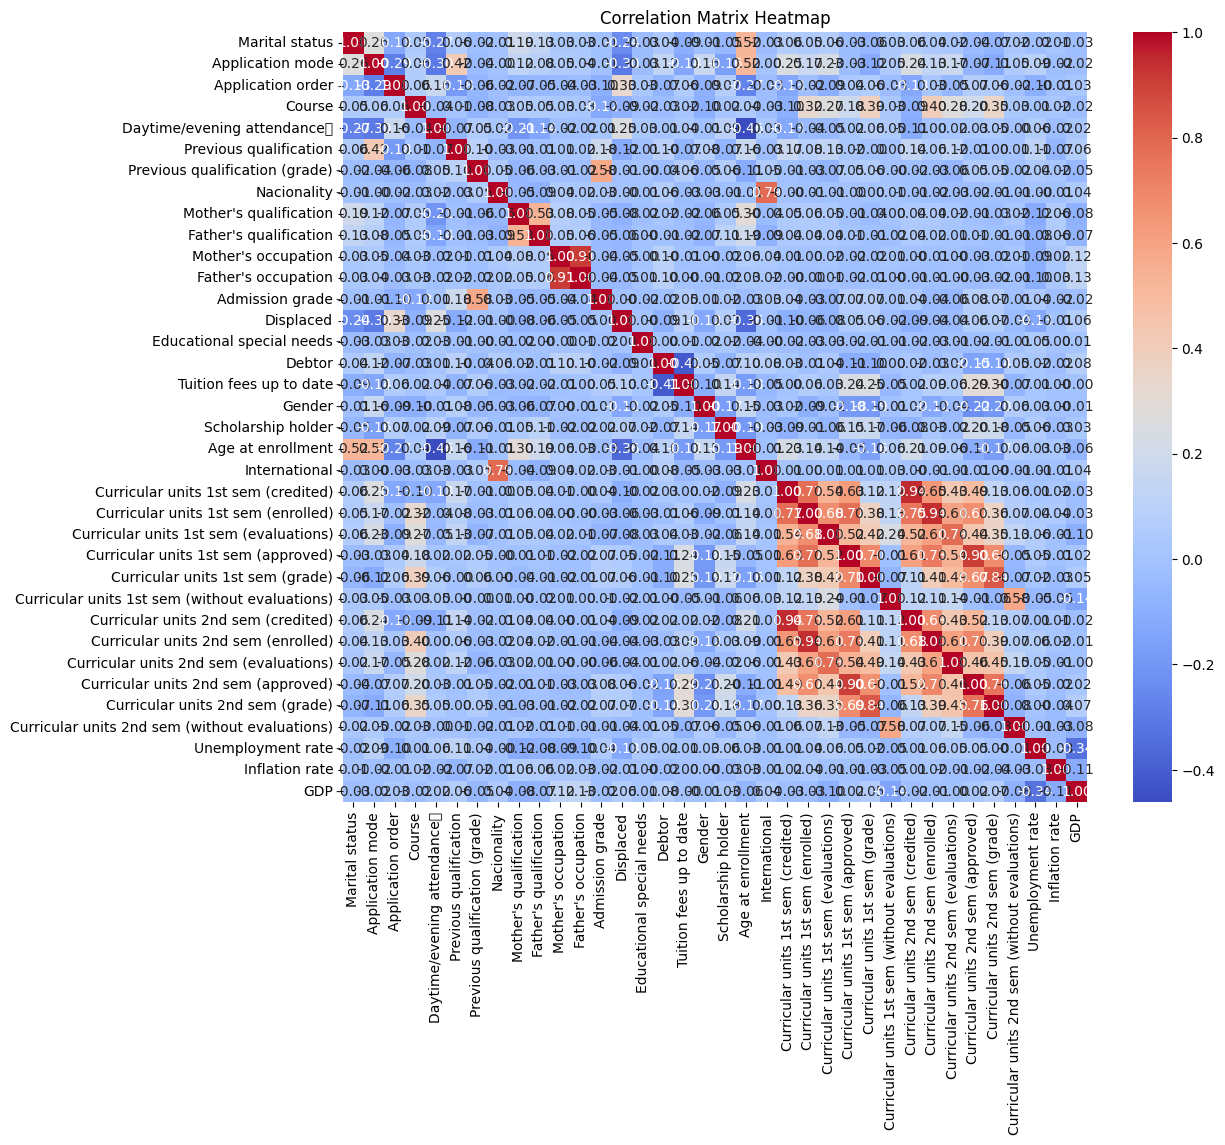

In [97]:
# Load your dataset
data = pd.read_csv('Student_dataset (1).csv')

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')  # Add a title to the heatmap
plt.show()  # Display the heatmap


In [99]:
# Flatten the correlation matrix and extract correlation pairs (excluding self-correlation)
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Sort by absolute correlation value
top_5_correlations = correlation_pairs.abs().sort_values(ascending=False).head(5).reset_index()
top_5_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display the top 5 correlations
print("Top 5 Feature Pairs with Highest Correlation:")
top_5_correlations


Top 5 Feature Pairs with Highest Correlation:


,Feature 1,Feature 2,Correlation
0,Curricular units 2nd sem (credited),Curricular units 1st sem (credited),0.944527
1,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.944527
2,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.942590
3,Curricular units 2nd sem (enrolled),Curricular units 1st sem (enrolled),0.942590
4,Father's occupation,Mother's occupation,0.910450


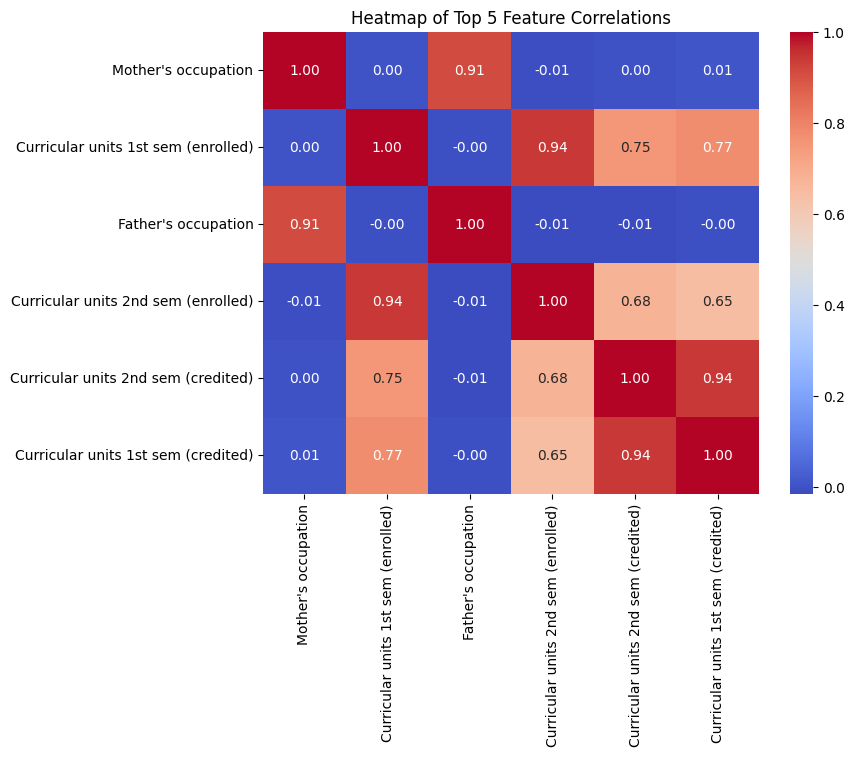

In [101]:
# Extract the unique features from the top 5 correlations
top_5_features = set(top_5_correlations['Feature 1']).union(set(top_5_correlations['Feature 2']))

# Create a smaller correlation matrix for the selected features
top_5_correlation_matrix = correlation_matrix.loc[list(top_5_features), list(top_5_features)]

# Generate a heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(top_5_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Top 5 Feature Correlations')  # Add a title
plt.show()  # Display the heatmap


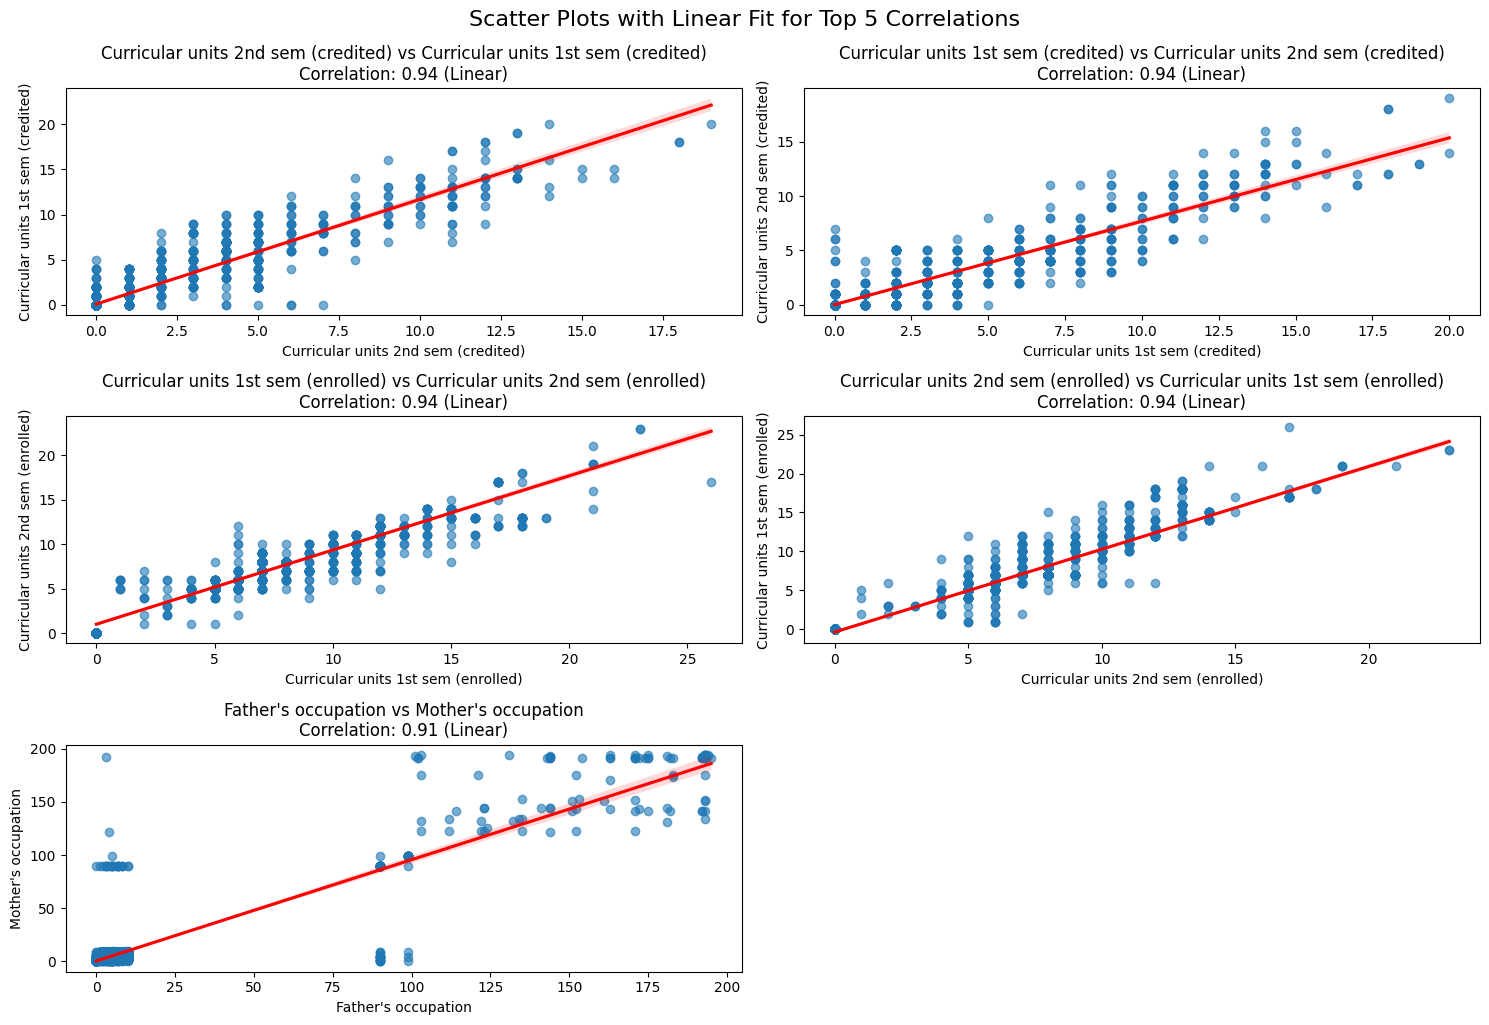

In [107]:
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plots for the top 5 correlations with linear fit and linearity check
plt.figure(figsize=(15, 10))

for i, row in enumerate(top_5_correlations.itertuples(), 1):
    feature1 = row._1  # Feature 1
    feature2 = row._2  # Feature 2

    # Compute Pearson correlation coefficient
    correlation, _ = pearsonr(data[feature1], data[feature2])
    linearity = "Linear" if abs(correlation) > 0.7 else "Non-linear"

    # Create a subplot
    plt.subplot(3, 2, i)
    sns.regplot(x=data[feature1], y=data[feature2], line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
    plt.title(f'{feature1} vs {feature2}\nCorrelation: {correlation:.2f} ({linearity})')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.suptitle('Scatter Plots with Linear Fit for Top 5 Correlations', y=1.02, fontsize=16)
plt.show()


## boleh masuk step 2 dah ##
